In [4]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from preprocessing import preprocessing
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

cols_eliminar = ['fecha', 'id', 'titulo', 'descripcion', 'direccion', \
                 'lat', 'lng','posicion','provincia', 'ciudad','gimnasio',\
                 'usosmultiples','escuelascercanas','centroscomercialescercanos']

df_train, _ = preprocessing(False, cols_eliminar)

df_train = df_train.astype({'provincia_ordinal':'int', 'ciudad_ordinal':'int'})

X = np.array(df_train.drop(columns=['precio', 'log_precio']).values, 'float32')
Y = np.array(df_train[['log_precio']].values, 'float32')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [6]:
min_child_weight = []
for param in [0.05,0.1,0.5,0.7,0.8,0.9,1,1.1,1.2]:
	model = XGBRegressor(n_estimators=150,max_depth=20,subsample=0.7,
	colsample_bytree=0.7,learning_rate=0.1,nthread=8,num_parallel_tree=10, min_child_weight=param)
	model.fit(X_train, Y_train)
	score = mean_absolute_error(np.exp(model.predict(X_test)), np.exp(Y_test))
	with open('min_child_weight.txt', 'a') as file:
		file.write('valor:'+str(param)+', score:'+str(score)+'\n')

In [7]:
subsample = []
for param in [i/10 for i in range(3,10)]:
	model = XGBRegressor(n_estimators=150,max_depth=20,min_child_weight=3,
	colsample_bytree=0.7,learning_rate=0.1,nthread=8,num_parallel_tree=10, subsample=param)
	model.fit(X_train, Y_train)
	score = mean_absolute_error(np.exp(model.predict(X_test)), np.exp(Y_test))
	with open('subsample.txt', 'a') as file:
		file.write('valor:'+str(param)+', score:'+str(score)+'\n')

[08:51:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:07:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:25:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:45:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:05:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:25:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:44:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [9]:
reg_alpha = []
for param in [i/10 for i in range(10)]:
	model = XGBRegressor(n_estimators=150,max_depth=20,subsample=0.7,min_child_weight=3,
	colsample_bytree=0.7,learning_rate=0.1,nthread=6,num_parallel_tree=10, reg_alpha=param)
	model.fit(X_train, Y_train)
	score = mean_absolute_error(np.exp(model.predict(X_test)), np.exp(Y_test))
	with open('reg_alpha.txt', 'a') as file:
		file.write('valor:'+str(param)+', score:'+str(score)+'\n')

[11:22:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:46:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:10:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:34:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:57:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


KeyboardInterrupt: 

In [20]:
learning_rate = []
for param in [i/100 for i in range(8,11)]:
    model = XGBRegressor(n_estimators=150,max_depth=20,subsample=0.7,min_child_weight=3,
    colsample_bytree=0.7, nthread=8,num_parallel_tree=10, learning_rate=param)
    model.fit(X_train, Y_train)
    score = mean_absolute_error(np.exp(model.predict(X_test)), np.exp(Y_test))
    with open('learning_rate.txt', 'a') as file:
        file.write('valor:'+str(param)+', prediccion:'+str(score)+'\n')

[17:05:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:26:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:50:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [8]:
reg_lambda = []
for param in [i/10 for i in range(10)]:
	model = XGBRegressor(n_estimators=150,max_depth=20,subsample=0.7,min_child_weight=3,
	colsample_bytree=0.7,learning_rate=0.1,nthread=8,num_parallel_tree=10, reg_lambda=param)
	model.fit(X_train, Y_train)
	score = mean_absolute_error(np.exp(model.predict(X_test)), np.exp(Y_test))
	with open('reg_lambda.txt', 'a') as file:
		file.write('valor:'+str(param)+', score:'+str(score)+'\n')

[11:03:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

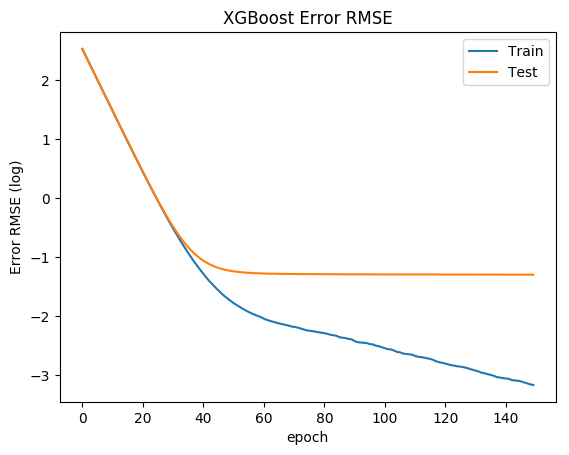

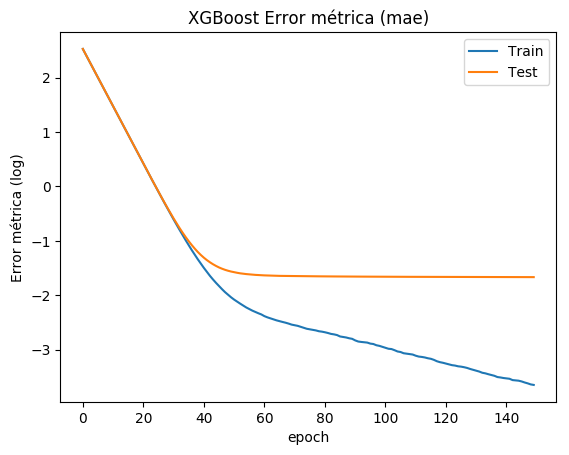

In [58]:
# retrieve performance metrics
results = modelo_xgboost.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, np.log(results['validation_0']['rmse']), label='Train')
ax.plot(x_axis, np.log(results['validation_1']['rmse']), label='Test')
ax.legend()
pyplot.ylabel('Error RMSE (log)')
pyplot.xlabel('epoch')
pyplot.title('XGBoost Error RMSE')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, np.log(results['validation_0']['mae']), label='Train')
ax.plot(x_axis, np.log(results['validation_1']['mae']), label='Test')
ax.legend()
pyplot.ylabel('Error métrica (log)')
pyplot.xlabel('epoch')
pyplot.title('XGBoost Error métrica (mae)')
pyplot.show()